In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import os
import sys
from datetime import datetime

# ML
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Nos modules
sys.path.append(os.path.abspath('..'))
from src.data.load_data import load_california_housing_data
from src.data.preprocess import DataPreprocessor

# Config
import warnings
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

print(" Imports réussis !")

 Imports réussis !


In [2]:
print(" Chargement et preprocessing des données...")
print("=" * 60)

# Charger les données
df = load_california_housing_data()
print(f"Données brutes : {df.shape}")

# Preprocessing complet
preprocessor = DataPreprocessor()
X_train, X_test, y_train, y_test = preprocessor.fit_transform(df, test_size=0.2, random_state=42)

print(f"\n Données préparées :")
print(f"  • X_train : {X_train.shape}")
print(f"  • X_test  : {X_test.shape}")
print(f"  • y_train : {y_train.shape}")
print(f"  • y_test  : {y_test.shape}")

print(f"\n Features ({len(preprocessor.get_feature_names())}) :")
for feat in preprocessor.get_feature_names():
    print(f"  • {feat}")

 Chargement et preprocessing des données...
Données brutes : (20640, 9)
Feature Engineering...
Cap outliers...
Train/Test Split...
Scaling...
Done! Train: 16512, Test: 4128

 Données préparées :
  • X_train : (16512, 13)
  • X_test  : (4128, 13)
  • y_train : (16512,)
  • y_test  : (4128,)

 Features (13) :
  • MedInc
  • HouseAge
  • AveRooms
  • AveBedrms
  • Population
  • AveOccup
  • Latitude
  • Longitude
  • BedroomRatio
  • RoomsPerPerson
  • PopulationDensity
  • IncomeAge
  • DistanceToSF


In [3]:
def evaluate_model(model, X_train, X_test, y_train, y_test, model_name="Model"):
    """
    Évalue un modèle sur train et test sets.
    
    Args:
        model: Modèle sklearn
        X_train, X_test: Features
        y_train, y_test: Target
        model_name: Nom du modèle pour affichage
    
    Returns:
        dict: Métriques du modèle
    """
    # Prédictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Métriques TRAIN
    train_mae = mean_absolute_error(y_train, y_train_pred)
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    train_r2 = r2_score(y_train, y_train_pred)
    
    # Métriques TEST
    test_mae = mean_absolute_error(y_test, y_test_pred)
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    test_r2 = r2_score(y_test, y_test_pred)
    
    # Affichage
    print(f"\n{'='*60}")
    print(f" {model_name}")
    print(f"{'='*60}")
    print(f"\n TRAIN SET :")
    print(f"  • MAE   : ${train_mae*100:.2f}k")
    print(f"  • RMSE  : ${train_rmse*100:.2f}k")
    print(f"  • R²    : {train_r2:.4f}")
    
    print(f"\n TEST SET :")
    print(f"  • MAE   : ${test_mae*100:.2f}k")
    print(f"  • RMSE  : ${test_rmse*100:.2f}k")
    print(f"  • R²    : {test_r2:.4f}")
    
    # Overfitting check
    overfit = train_r2 - test_r2
    if overfit > 0.1:
        print(f"\n  Overfitting détecté ! (Δ R² = {overfit:.4f})")
    else:
        print(f"\n Pas d'overfitting (Δ R² = {overfit:.4f})")
    
    # Retourner les métriques
    return {
        'model_name': model_name,
        'train_mae': train_mae,
        'train_rmse': train_rmse,
        'train_r2': train_r2,
        'test_mae': test_mae,
        'test_rmse': test_rmse,
        'test_r2': test_r2,
        'overfitting': overfit
    }

print(" Fonction d'évaluation créée")

 Fonction d'évaluation créée


In [4]:
print("\n" + " MODÈLE 1 : LINEAR REGRESSION")
print("=" * 60)

# Créer et entraîner le modèle
lr_model = LinearRegression()

print(" Entraînement en cours...")
lr_model.fit(X_train, y_train)
print(" Entraînement terminé")

# Évaluer
lr_metrics = evaluate_model(lr_model, X_train, X_test, y_train, y_test, "Linear Regression")


 MODÈLE 1 : LINEAR REGRESSION
 Entraînement en cours...
 Entraînement terminé

 Linear Regression

 TRAIN SET :
  • MAE   : $48.24k
  • RMSE  : $66.21k
  • R²    : 0.6720

 TEST SET :
  • MAE   : $49.07k
  • RMSE  : $67.55k
  • R²    : 0.6517

 Pas d'overfitting (Δ R² = 0.0203)


In [5]:
print("\n" + " MODÈLE 2 : RANDOM FOREST")
print("=" * 60)

# Créer le modèle
rf_model = RandomForestRegressor(
    n_estimators=100,      # 100 arbres
    max_depth=20,          # Profondeur max
    min_samples_split=5,   # Min échantillons pour split
    min_samples_leaf=2,    # Min échantillons par feuille
    random_state=42,
    n_jobs=-1              # Utiliser tous les CPU
)

print(" Entraînement en cours (peut prendre 10-20 secondes)...")
rf_model.fit(X_train, y_train)
print(" Entraînement terminé")

# Évaluer
rf_metrics = evaluate_model(rf_model, X_train, X_test, y_train, y_test, "Random Forest")


 MODÈLE 2 : RANDOM FOREST
 Entraînement en cours (peut prendre 10-20 secondes)...
 Entraînement terminé

 Random Forest

 TRAIN SET :
  • MAE   : $15.00k
  • RMSE  : $24.31k
  • R²    : 0.9558

 TEST SET :
  • MAE   : $32.40k
  • RMSE  : $50.22k
  • R²    : 0.8075

  Overfitting détecté ! (Δ R² = 0.1483)


In [6]:
print("\n" + " MODÈLE 3 : GRADIENT BOOSTING")
print("=" * 60)

# Créer le modèle
gb_model = GradientBoostingRegressor(
    n_estimators=100,      # 100 arbres
    learning_rate=0.1,     # Taux d'apprentissage
    max_depth=5,           # Profondeur
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42
)

print(" Entraînement en cours (peut prendre 20-30 secondes)...")
gb_model.fit(X_train, y_train)
print(" Entraînement terminé")

# Évaluer
gb_metrics = evaluate_model(gb_model, X_train, X_test, y_train, y_test, "Gradient Boosting")


 MODÈLE 3 : GRADIENT BOOSTING
 Entraînement en cours (peut prendre 20-30 secondes)...
 Entraînement terminé

 Gradient Boosting

 TRAIN SET :
  • MAE   : $27.98k
  • RMSE  : $40.35k
  • R²    : 0.8782

 TEST SET :
  • MAE   : $32.03k
  • RMSE  : $47.90k
  • R²    : 0.8249

 Pas d'overfitting (Δ R² = 0.0533)


In [7]:
print("\n" + " COMPARAISON DES MODÈLES")
print("=" * 60)

# Créer un DataFrame avec toutes les métriques
results_df = pd.DataFrame([lr_metrics, rf_metrics, gb_metrics])

print("\n Résumé des performances (TEST SET) :")
print(results_df[['model_name', 'test_mae', 'test_rmse', 'test_r2', 'overfitting']].to_string(index=False))

# Trouver le meilleur modèle (selon R² sur test)
best_model_idx = results_df['test_r2'].idxmax()
best_model_name = results_df.loc[best_model_idx, 'model_name']
best_r2 = results_df.loc[best_model_idx, 'test_r2']

print(f"\n MEILLEUR MODÈLE : {best_model_name}")
print(f"   R² Test : {best_r2:.4f}")


 COMPARAISON DES MODÈLES

 Résumé des performances (TEST SET) :
       model_name  test_mae  test_rmse  test_r2  overfitting
Linear Regression  0.490712   0.675550 0.651736     0.020283
    Random Forest  0.324042   0.502242 0.807505     0.148284
Gradient Boosting  0.320263   0.478965 0.824935     0.053255

 MEILLEUR MODÈLE : Gradient Boosting
   R² Test : 0.8249


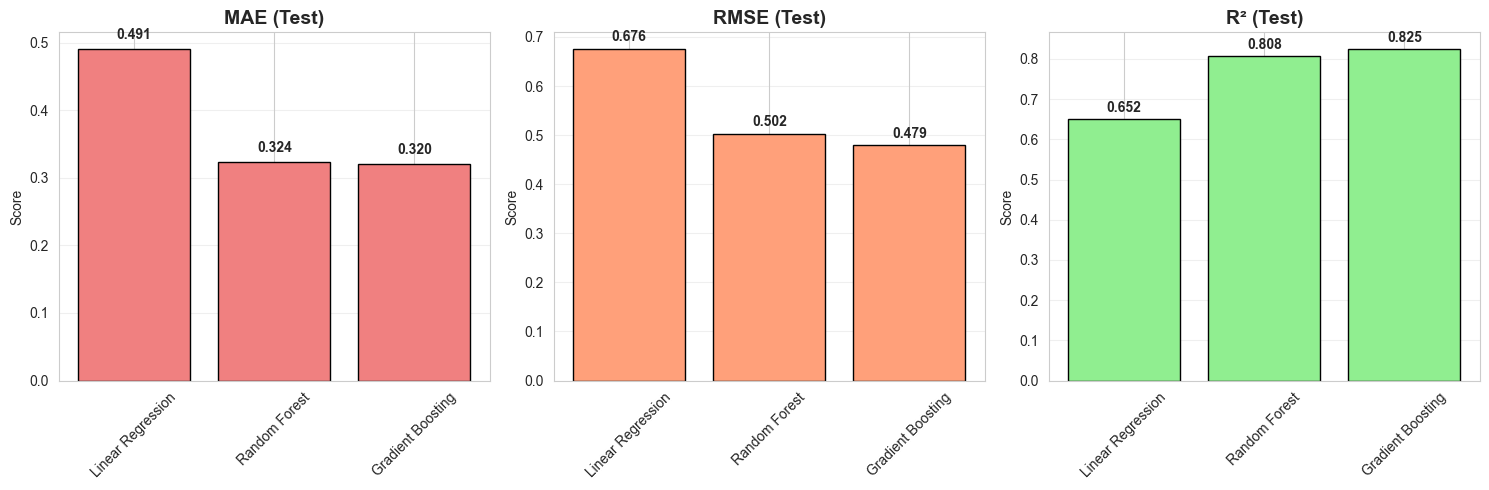


 Visualisation créée


In [8]:
# Graphique de comparaison
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

metrics = ['test_mae', 'test_rmse', 'test_r2']
titles = ['MAE (Test)', 'RMSE (Test)', 'R² (Test)']
colors = ['lightcoral', 'lightsalmon', 'lightgreen']

for i, (metric, title, color) in enumerate(zip(metrics, titles, colors)):
    axes[i].bar(results_df['model_name'], results_df[metric], color=color, edgecolor='black')
    axes[i].set_title(title, fontsize=14, fontweight='bold')
    axes[i].set_ylabel('Score')
    axes[i].grid(axis='y', alpha=0.3)
    axes[i].tick_params(axis='x', rotation=45)
    
    # Ajouter les valeurs sur les barres
    for j, v in enumerate(results_df[metric]):
        axes[i].text(j, v + 0.01, f'{v:.3f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

print("\n Visualisation créée")

In [9]:
print("\n" + " MODÈLE 2b : RANDOM FOREST OPTIMISÉ (Anti-Overfitting)")
print("=" * 60)

# Créer un modèle avec régularisation
rf_optimized = RandomForestRegressor(
    n_estimators=100,           # Garder 100 arbres
    max_depth=15,               # ⬇ Réduire profondeur (20→15)
    min_samples_split=10,       # ⬆ Augmenter (5→10)
    min_samples_leaf=4,         # ⬆ Augmenter (2→4)
    max_features='sqrt',        # Limiter features par arbre
    random_state=42,
    n_jobs=-1
)

print(" Entraînement en cours...")
rf_optimized.fit(X_train, y_train)
print(" Entraînement terminé")

# Évaluer
rf_opt_metrics = evaluate_model(rf_optimized, X_train, X_test, y_train, y_test, "Random Forest (Optimisé)")

# Comparer avec le RF original
print(f"\n COMPARAISON RF Original vs Optimisé :")
print(f"{'Métrique':<20} {'Original':<15} {'Optimisé':<15}")
print("-" * 50)
print(f"{'Test R²':<20} {rf_metrics['test_r2']:<15.4f} {rf_opt_metrics['test_r2']:<15.4f}")
print(f"{'Overfitting (ΔR²)':<20} {rf_metrics['overfitting']:<15.4f} {rf_opt_metrics['overfitting']:<15.4f}")
print(f"{'Test MAE':<20} ${rf_metrics['test_mae']*100:<14.2f}k ${rf_opt_metrics['test_mae']*100:<14.2f}k")

if rf_opt_metrics['overfitting'] < rf_metrics['overfitting']:
    print("\n L'overfitting a été réduit !")
else:
    print("\n Pas d'amélioration significative")


 MODÈLE 2b : RANDOM FOREST OPTIMISÉ (Anti-Overfitting)
 Entraînement en cours...
 Entraînement terminé

 Random Forest (Optimisé)

 TRAIN SET :
  • MAE   : $24.08k
  • RMSE  : $35.99k
  • R²    : 0.9031

 TEST SET :
  • MAE   : $33.62k
  • RMSE  : $50.71k
  • R²    : 0.8038

 Pas d'overfitting (Δ R² = 0.0993)

 COMPARAISON RF Original vs Optimisé :
Métrique             Original        Optimisé       
--------------------------------------------------
Test R²              0.8075          0.8038         
Overfitting (ΔR²)    0.1483          0.0993         
Test MAE             $32.40         k $33.62         k

 L'overfitting a été réduit !



 ANALYSE DES FEATURES IMPORTANTES

 Top 5 features - Random Forest :
  MedInc               : 0.5190
  AveOccup             : 0.1207
  Latitude             : 0.0699
  IncomeAge            : 0.0652
  DistanceToSF         : 0.0507

 Top 5 features - Random Forest (Optimisé) :
  MedInc               : 0.2841
  IncomeAge            : 0.1348
  RoomsPerPerson       : 0.0864
  Latitude             : 0.0856
  DistanceToSF         : 0.0834

 Top 5 features - Gradient Boosting :
  MedInc               : 0.5387
  AveOccup             : 0.1106
  Latitude             : 0.0881
  DistanceToSF         : 0.0686
  IncomeAge            : 0.0657


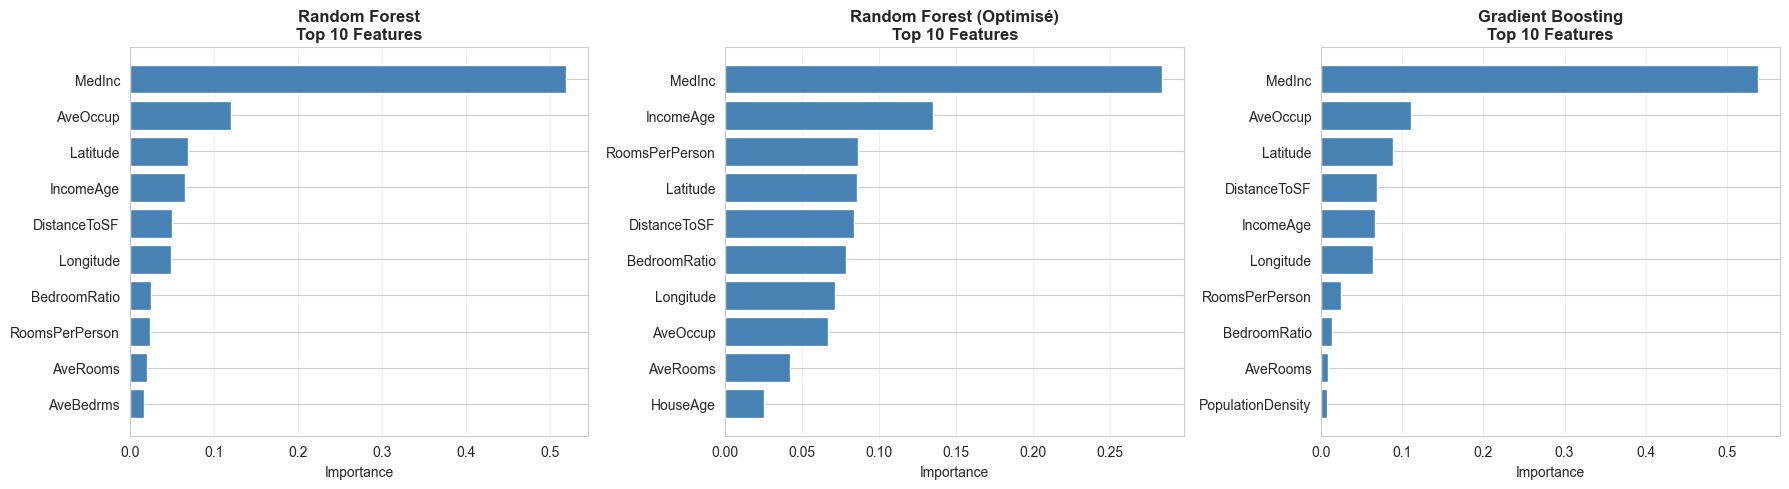


 Analyse des features terminée


In [10]:
print("\n" + " ANALYSE DES FEATURES IMPORTANTES")
print("=" * 60)

# Random Forest et Gradient Boosting ont .feature_importances_
models_with_importance = [
    (rf_model, "Random Forest"),
    (rf_optimized, "Random Forest (Optimisé)"),
    (gb_model, "Gradient Boosting")
]

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, (model, name) in enumerate(models_with_importance):
    # Obtenir les importances
    importances = model.feature_importances_
    feature_names = preprocessor.get_feature_names()
    
    # Créer un DataFrame
    importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': importances
    }).sort_values('Importance', ascending=False)
    
    # Top 10
    top_10 = importance_df.head(10)
    
    # Graphique
    axes[i].barh(range(len(top_10)), top_10['Importance'], color='steelblue')
    axes[i].set_yticks(range(len(top_10)))
    axes[i].set_yticklabels(top_10['Feature'])
    axes[i].set_xlabel('Importance')
    axes[i].set_title(f'{name}\nTop 10 Features', fontweight='bold')
    axes[i].invert_yaxis()
    axes[i].grid(axis='x', alpha=0.3)
    
    # Afficher dans le terminal
    print(f"\n Top 5 features - {name} :")
    for idx, row in importance_df.head(5).iterrows():
        print(f"  {row['Feature']:<20} : {row['Importance']:.4f}")

plt.tight_layout()
plt.show()

print("\n Analyse des features terminée")


 VISUALISATION DES PRÉDICTIONS


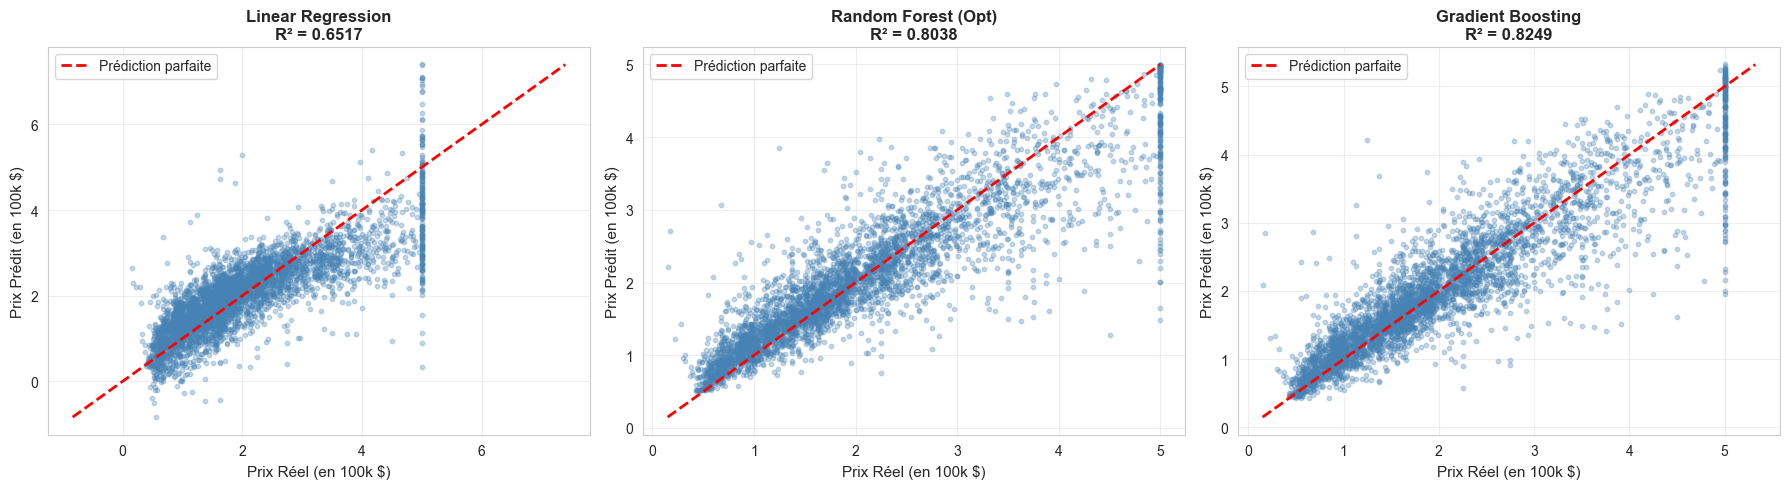


 Interprétation :
  • Points proches de la ligne rouge = bonnes prédictions
  • Points éloignés = erreurs de prédiction


In [11]:
print("\n" + " VISUALISATION DES PRÉDICTIONS")
print("=" * 60)

# Utiliser le meilleur modèle
# On va comparer les 3 modèles principaux

models_to_plot = [
    (lr_model, "Linear Regression"),
    (rf_optimized, "Random Forest (Opt)"),
    (gb_model, "Gradient Boosting")
]

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, (model, name) in enumerate(models_to_plot):
    # Prédictions sur test
    y_pred = model.predict(X_test)
    
    # Scatter plot : Réel vs Prédit
    axes[i].scatter(y_test, y_pred, alpha=0.3, s=10, color='steelblue')
    
    # Ligne parfaite (y=x)
    min_val = min(y_test.min(), y_pred.min())
    max_val = max(y_test.max(), y_pred.max())
    axes[i].plot([min_val, max_val], [min_val, max_val], 'r--', linewidth=2, label='Prédiction parfaite')
    
    # Calculer R²
    r2 = r2_score(y_test, y_pred)
    
    axes[i].set_xlabel('Prix Réel (en 100k $)', fontsize=11)
    axes[i].set_ylabel('Prix Prédit (en 100k $)', fontsize=11)
    axes[i].set_title(f'{name}\nR² = {r2:.4f}', fontweight='bold')
    axes[i].legend()
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n Interprétation :")
print("  • Points proches de la ligne rouge = bonnes prédictions")
print("  • Points éloignés = erreurs de prédiction")


 DISTRIBUTION DES ERREURS


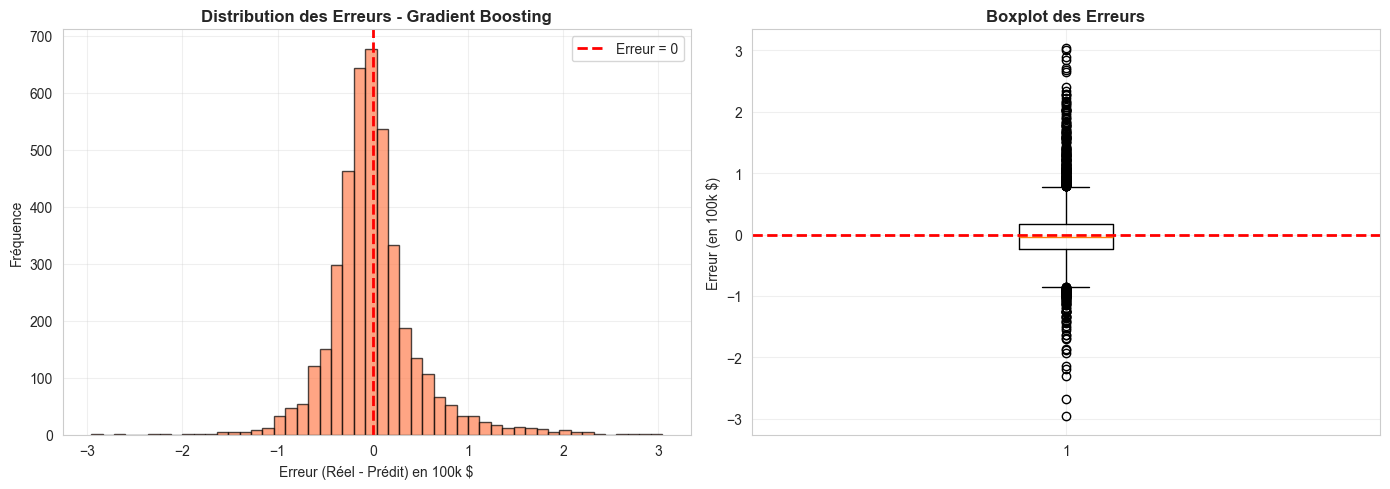


 Statistiques des erreurs :
  • Erreur moyenne : $-0.15k
  • Écart-type     : $47.90k
  • Erreur min     : $-295.89k
  • Erreur max     : $303.99k


In [ ]:
# Distribution des erreurs pour le meilleur modèle
print("\n" + " DISTRIBUTION DES ERREURS")
print("=" * 60)

# Sélectionner le meilleur modèle (ici on prend Gradient Boosting comme exemple)
best_model = gb_model 
best_model_name = "Gradient Boosting"

# Prédictions
y_pred = best_model.predict(X_test)

# Erreurs
errors = y_test - y_pred  # Erreur = Réel - Prédit

# Visualisation
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogramme des erreurs
axes[0].hist(errors, bins=50, color='coral', edgecolor='black', alpha=0.7)
axes[0].axvline(x=0, color='red', linestyle='--', linewidth=2, label='Erreur = 0')
axes[0].set_xlabel('Erreur (Réel - Prédit) en 100k $')
axes[0].set_ylabel('Fréquence')
axes[0].set_title(f'Distribution des Erreurs - {best_model_name}', fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Boxplot des erreurs
axes[1].boxplot(errors, vert=True)
axes[1].axhline(y=0, color='red', linestyle='--', linewidth=2)
axes[1].set_ylabel('Erreur (en 100k $)')
axes[1].set_title('Boxplot des Erreurs', fontweight='bold')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Statistiques
print(f"\n Statistiques des erreurs :")
print(f"  • Erreur moyenne : ${errors.mean()*100:.2f}k")
print(f"  • Écart-type     : ${errors.std()*100:.2f}k")
print(f"  • Erreur min     : ${errors.min()*100:.2f}k")
print(f"  • Erreur max     : ${errors.max()*100:.2f}k")

In [13]:
print("\n" + " SÉLECTION DU MEILLEUR MODÈLE")
print("=" * 60)

# Mettre à jour results_df avec le RF optimisé
all_metrics = [lr_metrics, rf_metrics, rf_opt_metrics, gb_metrics]
results_df = pd.DataFrame(all_metrics)

# Trouver le meilleur (selon R² test)
best_idx = results_df['test_r2'].idxmax()
best_model_name = results_df.loc[best_idx, 'model_name']
best_test_r2 = results_df.loc[best_idx, 'test_r2']
best_test_mae = results_df.loc[best_idx, 'test_mae']

print(f"\n MEILLEUR MODÈLE : {best_model_name}")
print(f"  • Test R²   : {best_test_r2:.4f}")
print(f"  • Test MAE  : ${best_test_mae*100:.2f}k")

# Mapper le nom au modèle
model_mapping = {
    'Linear Regression': lr_model,
    'Random Forest': rf_model,
    'Random Forest (Optimisé)': rf_optimized,
    'Gradient Boosting': gb_model
}

final_model = model_mapping[best_model_name]
print(f"\n Modèle sélectionné pour la production : {best_model_name}")


 SÉLECTION DU MEILLEUR MODÈLE

 MEILLEUR MODÈLE : Gradient Boosting
  • Test R²   : 0.8249
  • Test MAE  : $32.03k

 Modèle sélectionné pour la production : Gradient Boosting


In [14]:
print("\n" + " SAUVEGARDE DU MODÈLE")
print("=" * 60)

# Créer le dossier models s'il n'existe pas
os.makedirs('../models', exist_ok=True)

# Nom du fichier
model_filename = f"../models/best_model_{datetime.now().strftime('%Y%m%d')}.joblib"

# Sauvegarder le modèle
joblib.dump(final_model, model_filename)
print(f" Modèle sauvegardé : {model_filename}")

# Sauvegarder aussi le preprocessor (pour utilisation en prod)
preprocessor_filename = "../models/preprocessor.joblib"
joblib.dump(preprocessor, preprocessor_filename)
print(f" Preprocessor sauvegardé : {preprocessor_filename}")

# Créer un fichier de métadonnées
metadata = {
    'model_name': best_model_name,
    'model_type': type(final_model).__name__,
    'training_date': datetime.now().isoformat(),
    'metrics': {
        'test_r2': float(best_test_r2),
        'test_mae': float(best_test_mae),
        'test_rmse': float(results_df.loc[best_idx, 'test_rmse'])
    },
    'training_samples': int(len(X_train)),
    'test_samples': int(len(X_test)),
    'features': preprocessor.get_feature_names(),
    'n_features': len(preprocessor.get_feature_names())
}

# Sauvegarder métadonnées en JSON
import json
metadata_filename = "../models/model_metadata.json"
with open(metadata_filename, 'w') as f:
    json.dump(metadata, f, indent=2)

print(f" Métadonnées sauvegardées : {metadata_filename}")

print(f"\n Fichiers créés :")
print(f"  • {model_filename}")
print(f"  • {preprocessor_filename}")
print(f"  • {metadata_filename}")


 SAUVEGARDE DU MODÈLE
 Modèle sauvegardé : ../models/best_model_20260207.joblib
 Preprocessor sauvegardé : ../models/preprocessor.joblib
 Métadonnées sauvegardées : ../models/model_metadata.json

 Fichiers créés :
  • ../models/best_model_20260207.joblib
  • ../models/preprocessor.joblib
  • ../models/model_metadata.json


In [19]:
print("\n" + " SAUVEGARDE DANS MONGODB")
print("=" * 60)

from src.database.mongodb import MongoDBConnection

# Connexion
mongo = MongoDBConnection()
db = mongo.connect()

if db is not None:
    collection = db['models']
    
    # Document à insérer
    model_doc = {
        'model_name': best_model_name,
        'model_type': type(final_model).__name__,
        'version': datetime.now().strftime('%Y%m%d_%H%M%S'),
        'training_date': datetime.now(),
        'metrics': {
            'test_r2': float(best_test_r2),
            'test_mae': float(best_test_mae),
            'test_rmse': float(results_df.loc[best_idx, 'test_rmse']),
            'train_r2': float(results_df.loc[best_idx, 'train_r2']),
            'overfitting': float(results_df.loc[best_idx, 'overfitting'])
        },
        'dataset': {
            'train_samples': int(len(X_train)),
            'test_samples': int(len(X_test)),
            'n_features': len(preprocessor.get_feature_names()),
            'features': preprocessor.get_feature_names()
        },
        'file_path': model_filename,
        'status': 'production'
    }
    
    # Insérer
    result = collection.insert_one(model_doc)
    print(f" Modèle enregistré dans MongoDB")
    print(f"   ID : {result.inserted_id}")
    
    mongo.close()
else:
    print(" Impossible de se connecter à MongoDB")


 SAUVEGARDE DANS MONGODB
 Connecté à MongoDB : real_estate
 Modèle enregistré dans MongoDB
   ID : 698681df0718cc2d81037b90
 Connexion MongoDB fermée
